# HDB Resale Flat Prices

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split

from dateutil.relativedelta import relativedelta

In [3]:
file_path = "data/resale-flat-prices-based-on-registration-date-from-jan-2015-onwards.csv"
hdb_resale_prices_df = pd.read_csv(file_path)

In [4]:
hdb_resale_prices_df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [5]:
hdb_resale_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79100 entries, 0 to 79099
Data columns (total 11 columns):
month                  79100 non-null object
town                   79100 non-null object
flat_type              79100 non-null object
block                  79100 non-null object
street_name            79100 non-null object
storey_range           79100 non-null object
floor_area_sqm         79100 non-null float64
flat_model             79100 non-null object
lease_commence_date    79100 non-null int64
remaining_lease        79100 non-null int64
resale_price           79100 non-null float64
dtypes: float64(2), int64(2), object(7)
memory usage: 6.6+ MB


We have 79,100 entries and no missing data. Furthermore, we have 4 numerical columns (i.e. resale_price, floor_area_sqm, lease_commence_data, and remaining_lease) and all our other columns are String or date values. One of the numerial values is the resale_price, which is our target variable and the other 2 whilst numerical, are actual cardinal (e.g. represent a date or time value)

## Exploration

First, let's see how the resale value of our HDB flat developers over time. Can we identify a trend ?

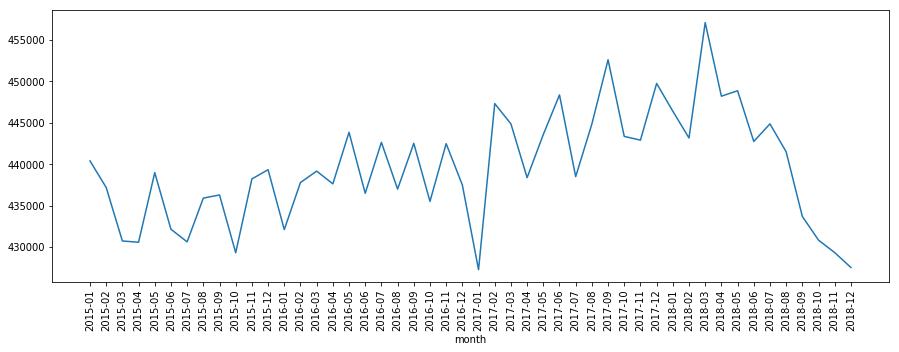

In [115]:
grouped_by_month = hdb_resale_prices_df.groupby(["month"]).mean()["resale_price"]
fig, ax = plt.subplots(figsize=(15, 5))
plt.xticks(rotation=90)
sns.lineplot(x=grouped_by_month.index, y=grouped_by_month.values, ax=ax)
plt.show()

Let's see how our dataset looks like!

In [141]:
def plot_bar_chart_for_column(col):
    """
    This function plots a bar chart for a categorical feature.
    :param col: String the column name to plot a bar chart for
    """
    count = hdb_resale_prices_df[col].value_counts()
    print("# of categories", len(count))
    fig, ax = plt.subplots(figsize=(15, 5))
    plt.xticks(rotation=90)
    sns.barplot(x=count.index, y=count.values, ax=ax)
    plt.show()
    
    
def plot_hist_chart_for_column(col, **kwargs):
    """
    This function plots a distribution for a continuous feature.
    :param col: String the column name to plot a bar chart for
    :param bins: integer number of bins
    """
    fig, ax = plt.subplots(figsize=(15, 5))
    sns.distplot(hdb_resale_prices_df[col], ax=ax, **kwargs)
    plt.show()
    

def plot_scatter_chart(x_col, y_col, **kwargs):
    fig, ax = plt.subplots(figsize=(15, 5))
    sns.regplot(hdb_resale_prices_df[x_col], hdb_resale_prices_df[y_col], ax=ax,**kwargs)
    plt.show()
    

def plot_box_plot(x_col, y_col, **kwargs):
    fig, ax = plt.subplots(figsize=(15, 5))
    plt.xticks(rotation=90)
    sns.boxplot(hdb_resale_prices_df[x_col], hdb_resale_prices_df[y_col], ax=ax,**kwargs)
    plt.show()

C:\Users\Kerem\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


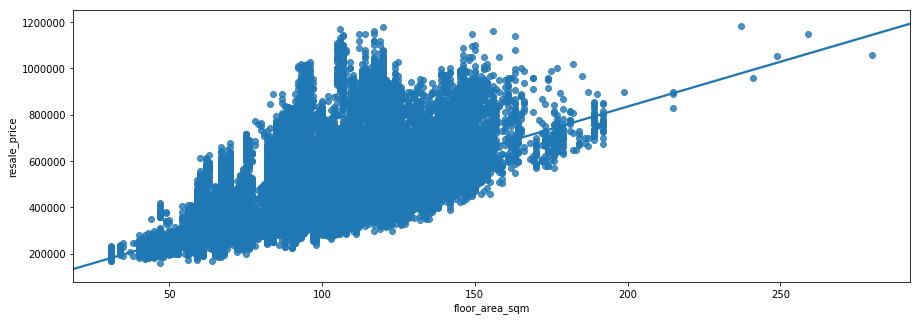

In [129]:
plot_scatter_chart("floor_area_sqm", "resale_price")

C:\Users\Kerem\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


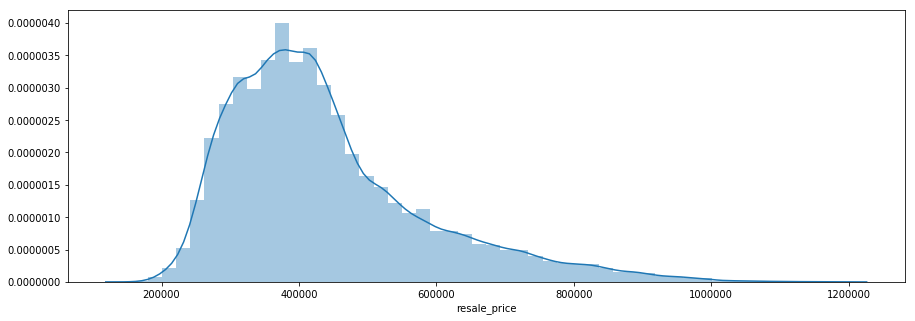

In [80]:
plot_hist_chart_for_column("resale_price")
# Tip #1: to see count pass kde=False as an argument to the function: plot_hist_chart_for_column("resale_price, kde=False")
# Tip #2: play around with bin values bins=<NUMBER_OF_BINS>: plot_hist_chart_for_column("resale_price, bins=5)

What can we observe from the data above ?

# of categories 7


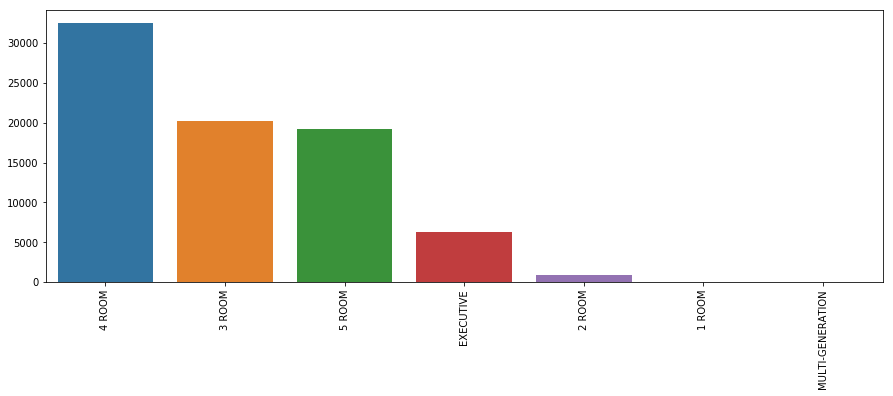

In [39]:
plot_bar_chart_for_column("flat_type")

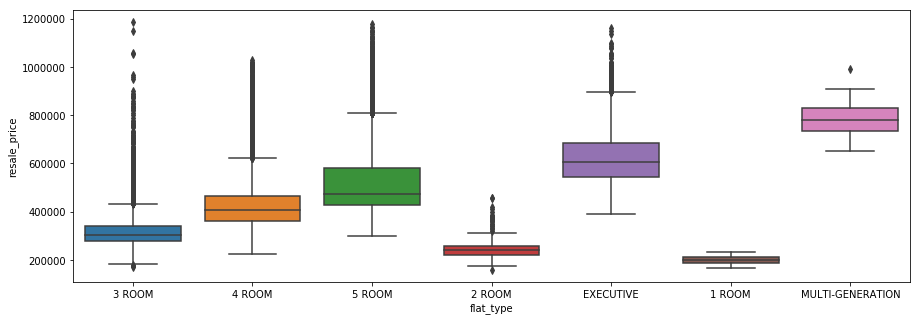

In [139]:
plot_box_plot("flat_type", "resale_price")

# of categories 26


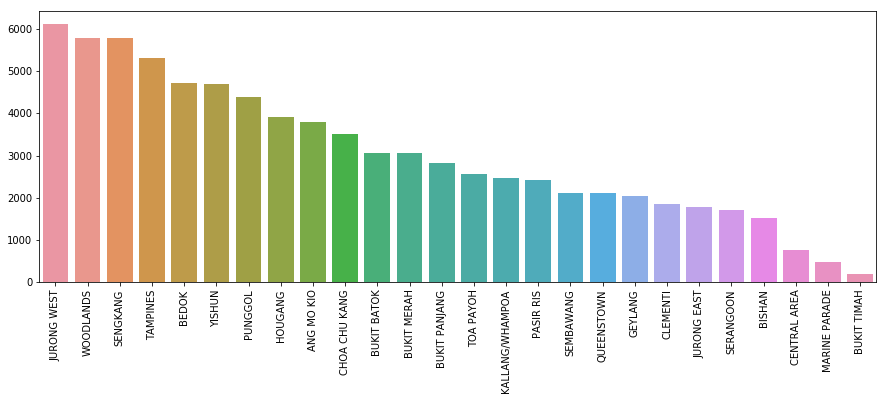

In [244]:
plot_bar_chart_for_column("town")

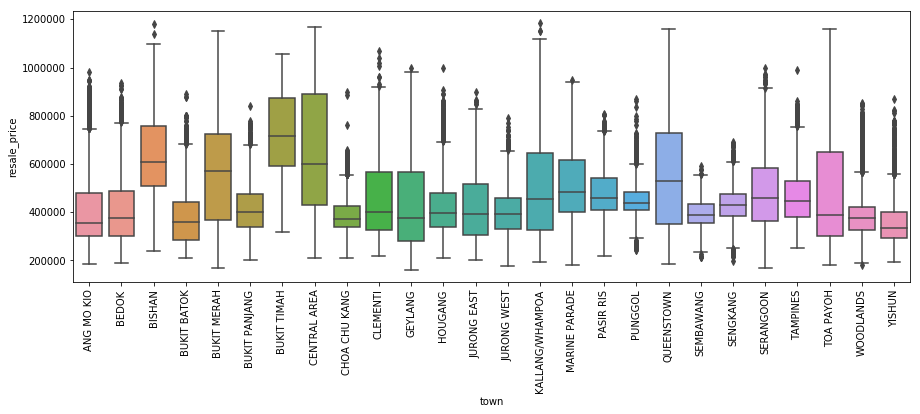

In [245]:
plot_box_plot("town", "resale_price")

# of categories 21


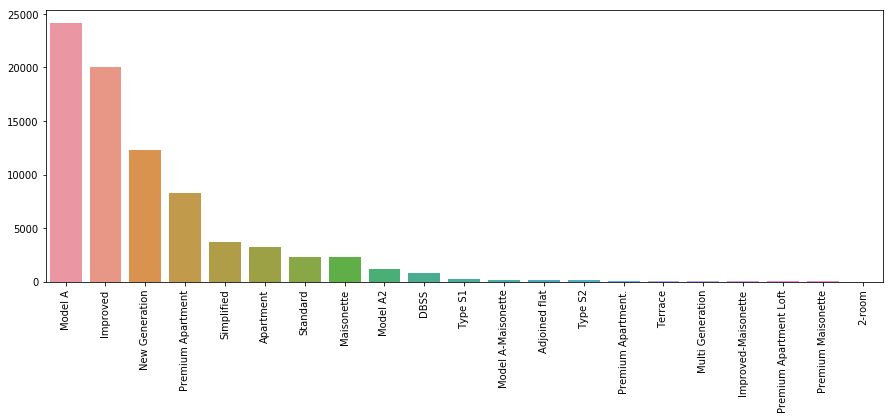

In [40]:
plot_bar_chart_for_column("flat_model")

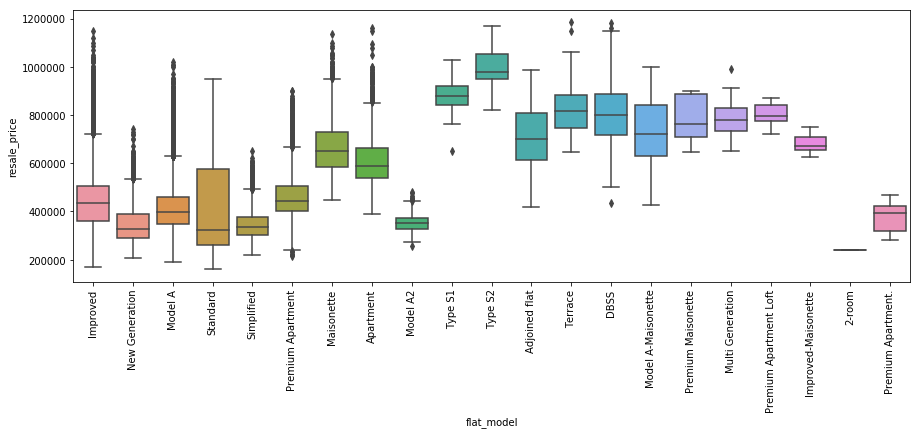

In [142]:
plot_box_plot("flat_model", "resale_price")

C:\Users\Kerem\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


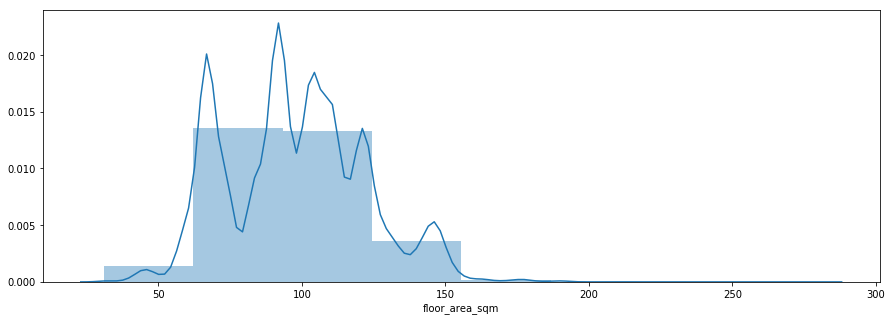

In [83]:
plot_hist_chart_for_column("floor_area_sqm", bins=8)

# of categories 17


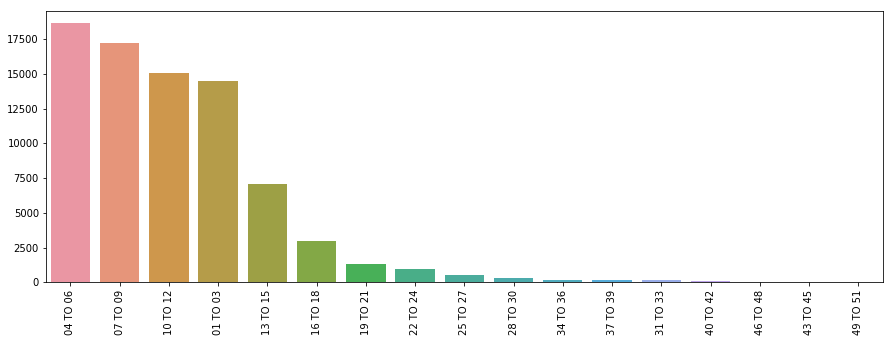

In [85]:
plot_bar_chart_for_column("storey_range")

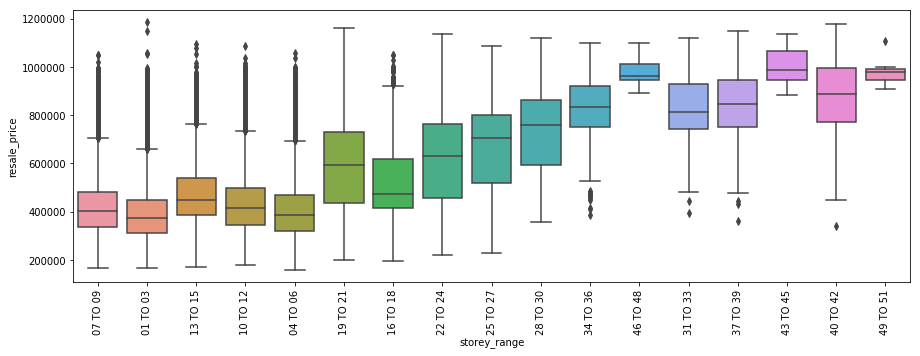

In [231]:
plot_box_plot("storey_range", "resale_price")

# of categories 51


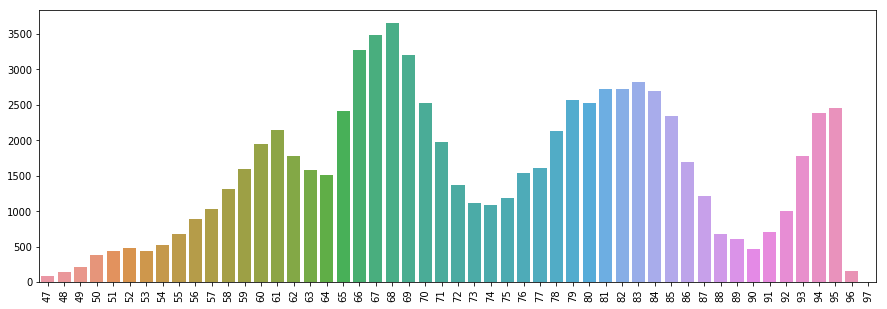

In [87]:
plot_bar_chart_for_column("remaining_lease")

C:\Users\Kerem\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


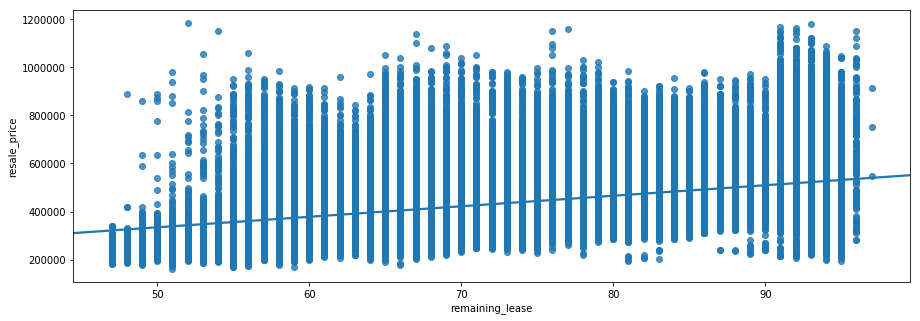

In [133]:
plot_scatter_chart("remaining_lease", "resale_price")

# of categories 51


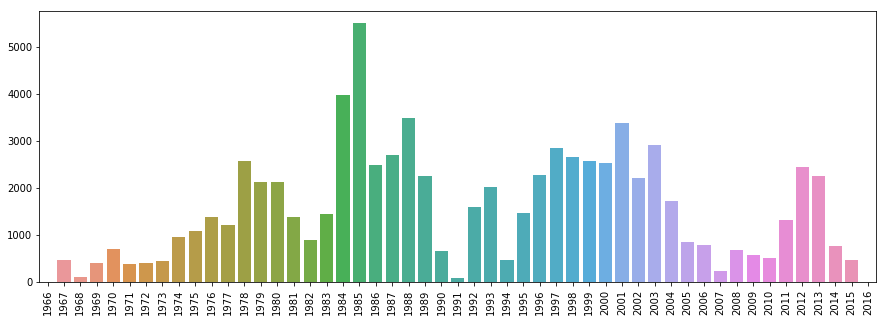

In [89]:
plot_bar_chart_for_column("lease_commence_date")

C:\Users\Kerem\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


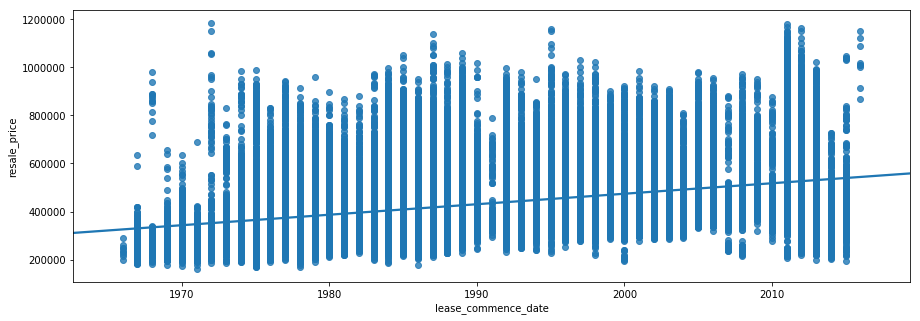

In [132]:
plot_scatter_chart("lease_commence_date", "resale_price")

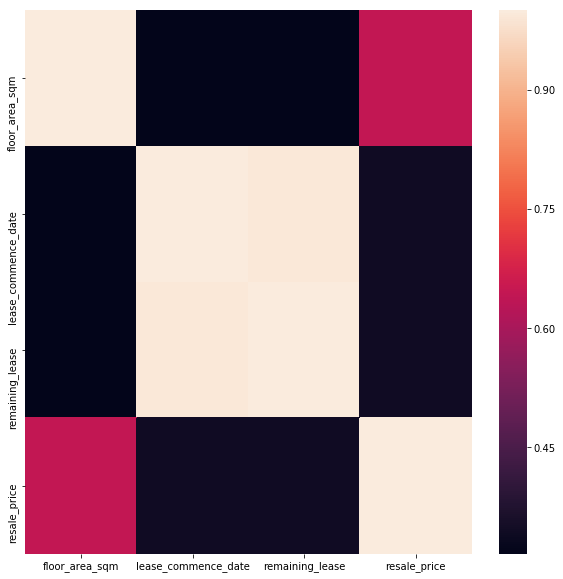

In [94]:
fig, ax = plt.subplots(figsize=(10,10))
correlation_matrix = hdb_resale_prices_df.corr()
sns.heatmap(correlation_matrix)
plt.show()

## Applying Linear Regression

So, we have done a quick exploration of the data so far. Now let's prepare our dataset for our linear regression modelling!
Overall, here is what we are going to do step by step. (We'll only do some steps if we have enough time)

1. Separate our target variable from our dataset
    - Note: We will start very simple with a single feature and add more features as we go
2. Create a training and test set
3. Form a baseline model.
4. Standardize or normalize our data for continuous variables.
5. Transform categorical data to numerical values. (Only if we have time)
6. Pick and train our model -> Linear Regression for today
7. Test our model.
8. Repeat these steps by playing around with features

In [10]:
# Overview of columns
hdb_resale_prices_df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

In [151]:
numerical_features = ["floor_area_sqm"]
cardinal_features = ["month", "remaining_lease", "lease_commence_date"]
categorical_features = ["town", "flat_type", "storey_range", "flat_model"]
deleted_columns = ["block", "street_name"]
target_variable = ["resale_price"]
assert (len(numerical_features) + len(cardinal_features) + len(categorical_features) + 
        len(deleted_columns) + len(target_variable)) == len(hdb_resale_prices_df.columns) , "The total selected columns don't match all columns"

X = hdb_resale_prices_df[numerical_features]
y = hdb_resale_prices_df[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) # 30% is generally an okay size for a test set.

This is how our dataset looks like now:

In [153]:
X_train.head()

,floor_area_sqm
56059,123.0
34887,67.0
53147,103.0
35914,92.0
68236,67.0


### Baseline model

Let's form our baseline model. We are going to do this very simplistic. Let's take the mean of all our resale flats and use that as our predicted value. First we need to calculate the mean value and then create an array (of length X_test) that contains the mean value.

In [154]:
mean_value = y_train.mean() 
prediction_test = np.array([mean_value for i in range(len(X_test))])
prediction_train = np.array([mean_value for i in range(len(X_train))])
prediction_test

array([[439471.44206592],
       [439471.44206592],
       [439471.44206592],
       ...,
       [439471.44206592],
       [439471.44206592],
       [439471.44206592]])

In [155]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse_test = mean_squared_error(y_test, prediction_test)
rmse_test = np.sqrt(mse_test)
mse_train = mean_squared_error(y_train, prediction_train)
rmse_train = np.sqrt(mse_train)
print("rmse for the test set is ", rmse_test)

rmse for the test set is  145968.25920950825


How can we interpret this result ? Can you think of a better baseline model ?

## Linear Regression

Here is how we apply the linear regression model on our data set

In [156]:
lr = LinearRegression(normalize=True, fit_intercept=False)
lr.fit(X_train, y_train)
predicted_lr = lr.predict(X_test)
mse_test = mean_squared_error(y_test, predicted_lr)
rmse_test = np.sqrt(mse_test)
print("rmse for the test set is ", rmse_test)

rmse for the test set is  113438.42368007792


Are we doing better ? How does our model look ?

In [157]:
print("Our coefficient for floor_area_sqm", lr.coef_, "our, intercept", lr.intercept_)

Our coefficient for floor_area_sqm [[4470.35467923]] our, intercept 0.0


Let's visualise the performance of our model

In [207]:
def plot_predictions_vs_real(y_true, pred, **kwargs):
    if isinstance(y_true, pd.Series) or isinstance(y_true, pd.DataFrame):
        y_true = np.array(y_true.values)
    if isinstance(pred,  pd.Series) or isinstance(y_true, pd.DataFrame):
        pred = np.array(pred.values)
    
    y_true = y_true.reshape(len(y_true), )
    pred = pred.reshape(len(pred), )

    fig, ax = plt.subplots(figsize=(15, 5))
    ax.set_xlabel("predicted value")
    ax.set_ylabel("True value")
    sns.regplot(pred, y_true, ax=ax, **kwargs)
    plt.show()

C:\Users\Kerem\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


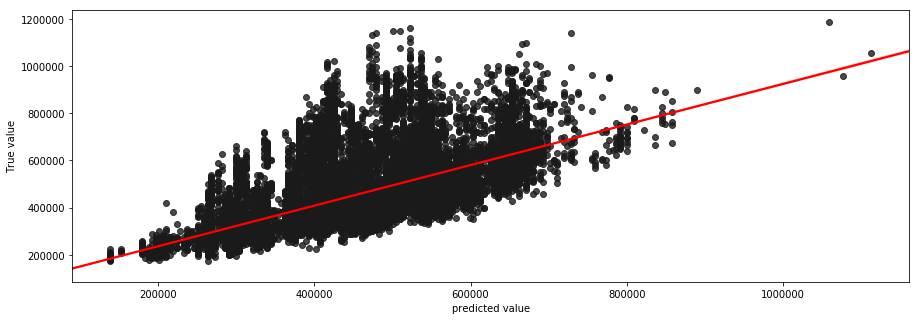

In [219]:
plot_predictions_vs_real(y_test, predicted_lr, line_kws={"color":"r"}, color=".1")

The graph above shows how accurate our model prediction is for the resale price vs the true price. Dots closer to the red line denote how accurate the model. As we can see there are many outliers.

## Let's get down to business!
Try adding different features to see whether we can improve our model. 

Given the exporation above what is a good feature to start with ? Play around, by adding more features. Don't forget to inspect the performance of your results!  

In [221]:
X = hdb_resale_prices_df.copy()
y = X["resale_price"]
del X["resale_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#### Adding flat_model as aohe feature

In [222]:
X_train_1 = X_train.copy()
X_test_1 = X_test.copy()
y_train_1 = y_train.copy()
y_test_1 = y_test.copy()

ohe = OneHotEncoder(handle_unknown="ignore", use_cat_names=True)
ohe_cols = ["flat_model"]
ohe_X_train = X_train_1[ohe_cols]
ohe_X_test = X_test_1[ohe_cols]

ohe.fit(ohe_X_train)
ohe_X_train = ohe.transform(ohe_X_train)
ohe_X_test = ohe.transform(ohe_X_test)

X_train_1 = pd.concat([X_train_1[["floor_area_sqm"]], ohe_X_train], axis=1)
X_train_1.fillna(0, inplace=True)
lr = LinearRegression(normalize=True)
lr.fit(X_train_1, y_train_1)

X_test_1 = pd.concat([X_test_1[["floor_area_sqm"]], ohe_X_test], axis=1)
X_test_1.fillna(0, inplace=True)
predicted = lr.predict(X_test_1)
mse = mean_squared_error(y_test_1, predicted)
print(np.sqrt(mse))

100259.34109789444


C:\Users\Kerem\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


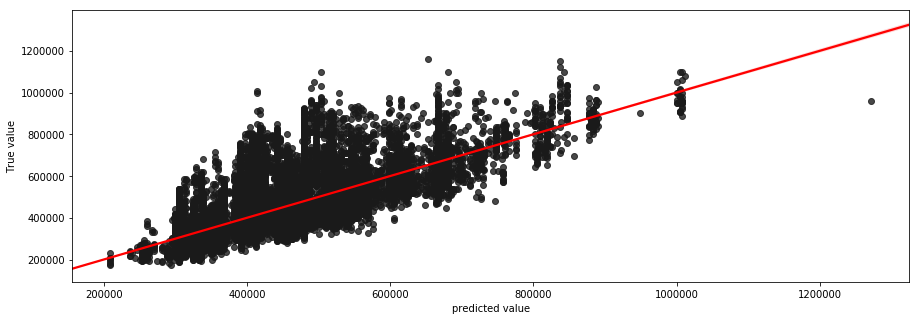

In [223]:
plot_predictions_vs_real(y_test_1, predicted, line_kws={"color":"r"}, color=".1")

In [225]:
from sklearn.preprocessing import StandardScaler

X_train_1 = X_train.copy()
X_test_1 = X_test.copy()
y_train_1 = y_train.copy()
y_test_1 = y_test.copy()

ohe = OneHotEncoder(handle_unknown="ignore", use_cat_names=True)
ohe_cols = ["flat_model"]
ohe_X_train = X_train_1[ohe_cols]
ohe_X_test = X_test_1[ohe_cols]

ohe.fit(ohe_X_train)
ohe_X_train = ohe.transform(ohe_X_train)
ohe_X_test = ohe.transform(ohe_X_test)

sc  = StandardScaler()
X_train_1["floor_area_sqm"] = sc.fit_transform(X_train_1[["floor_area_sqm"]])
X_test_1["floor_area_sqm"] = sc.transform(X_test_1[["floor_area_sqm"]])

X_train_1 = pd.concat([X_train_1[["floor_area_sqm"]], ohe_X_train], axis=1)
X_train_1.fillna(0, inplace=True)
lr = LinearRegression(normalize=True)
lr.fit(X_train_1, y_train_1)

X_test_1 = pd.concat([X_test_1[["floor_area_sqm"]], ohe_X_test], axis=1)
X_test_1.fillna(0, inplace=True)
predicted = lr.predict(X_test_1)
mse = mean_squared_error(y_test_1, predicted)
print(np.sqrt(mse))

100229.59656697961


C:\Users\Kerem\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


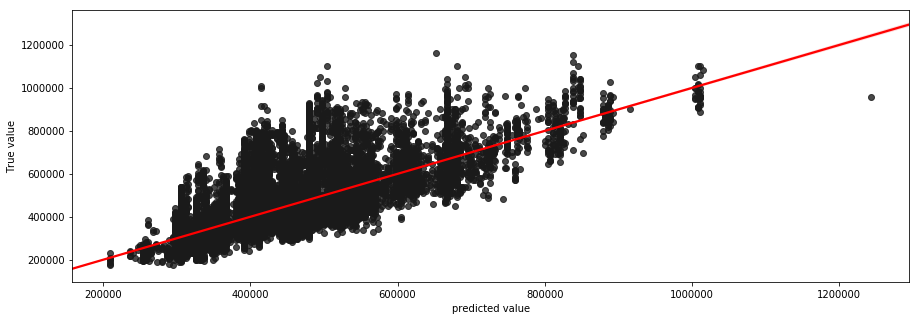

In [226]:
plot_predictions_vs_real(y_test_1, predicted, line_kws={"color":"r"}, color=".1")

#### Adding flat_type as a ohe feature


In [227]:
X_train_1 = X_train.copy()
X_test_1 = X_test.copy()
y_train_1 = y_train.copy()
y_test_1 = y_test.copy()

ohe = OneHotEncoder(handle_unknown="ignore", use_cat_names=True)
ohe_cols = ["flat_model", "flat_type"]
ohe_X_train = X_train_1[ohe_cols]
ohe_X_test = X_test_1[ohe_cols]

ohe.fit(ohe_X_train)
ohe_X_train = ohe.transform(ohe_X_train)
ohe_X_test = ohe.transform(ohe_X_test)

X_train_1 = pd.concat([X_train_1[["floor_area_sqm"]], ohe_X_train], axis=1)
X_train_1.fillna(0, inplace=True)
lr = LinearRegression(normalize=True)
lr.fit(X_train_1, y_train)

X_test_1 = pd.concat([X_test_1[["floor_area_sqm"]], ohe_X_test], axis=1)
X_test_1.fillna(0, inplace=True)
predicted = lr.predict(X_test_1)
mse = mean_squared_error(y_test_1, predicted)
print(np.sqrt(mse))

98710.69241281277


C:\Users\Kerem\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


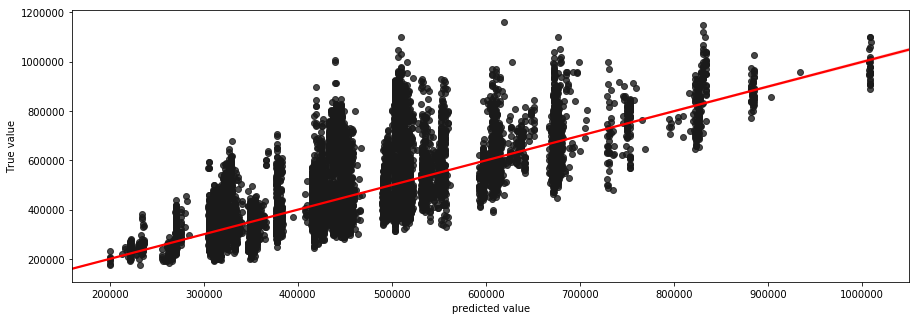

In [228]:
plot_predictions_vs_real(y_test_1, predicted, line_kws={"color":"r"}, color=".1")

#### Adding storey_range as a feature

In [229]:
X_train_1 = X_train.copy()
X_test_1 = X_test.copy()
y_train_1 = y_train.copy()
y_test_1 = y_test.copy()

ohe = OneHotEncoder(handle_unknown="ignore", use_cat_names=True)
ordinal = OrdinalEncoder(handle_unknown="ignore")

ohe_cols = ["flat_model", "flat_type"]
ordinal_cols = ["storey_range"]

ordinal.fit(X_train_1[ordinal_cols])
ordinal_X_train = ordinal.transform(X_train_1[ordinal_cols])
ordinal_X_test = ordinal.transform(X_test_1[ordinal_cols])
                                   
ohe.fit(X_train_1[ohe_cols])
ohe_X_train = ohe.transform(X_train_1[ohe_cols])
ohe_X_test = ohe.transform(X_test_1[ohe_cols])

X_train_1 = pd.concat([X_train_1[["floor_area_sqm"]], ohe_X_train, ordinal_X_train], axis=1)
X_train_1.fillna(0, inplace=True)
lr = LinearRegression(normalize=True)
lr.fit(X_train_1, y_train)

X_test_1 = pd.concat([X_test_1[["floor_area_sqm"]], ohe_X_test, ordinal_X_test], axis=1)
X_test_1.fillna(0, inplace=True)

predicted = lr.predict(X_test_1)
mse = mean_squared_error(y_test, predicted)
print(np.sqrt(mse))

92891.30533817358


C:\Users\Kerem\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


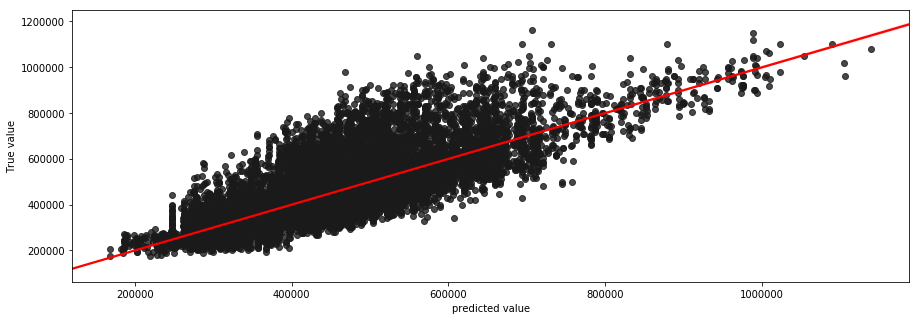

In [230]:
plot_predictions_vs_real(y_test_1, predicted, line_kws={"color":"r"}, color=".1")

#### Adding remaining_lease as feature

In [232]:
X_train_1 = X_train.copy()
X_test_1 = X_test.copy()
y_train_1 = y_train.copy()
y_test_1 = y_test.copy()

ohe = OneHotEncoder(handle_unknown="ignore", use_cat_names=True)
ordinal = OrdinalEncoder(handle_unknown="ignore")

ohe_cols = ["flat_model", "flat_type"]
ordinal_cols = ["storey_range", "remaining_lease"]

ordinal.fit(X_train_1[ordinal_cols])
ordinal_X_train = ordinal.transform(X_train_1[ordinal_cols])
ordinal_X_test = ordinal.transform(X_test_1[ordinal_cols])
                                   
ohe.fit(X_train_1[ohe_cols])
ohe_X_train = ohe.transform(X_train_1[ohe_cols])
ohe_X_test = ohe.transform(X_test_1[ohe_cols])

X_train_1 = pd.concat([X_train_1[["floor_area_sqm"]], ohe_X_train, ordinal_X_train], axis=1)
X_train_1.fillna(0, inplace=True)
lr = LinearRegression(normalize=True)
lr.fit(X_train_1, y_train_1)

X_test_1 = pd.concat([X_test_1[["floor_area_sqm"]], ohe_X_test, ordinal_X_test], axis=1)
X_test_1.fillna(0, inplace=True)

predicted = lr.predict(X_test_1)
mse = mean_squared_error(y_test_1, predicted)
print(np.sqrt(mse))

91968.01895590132


C:\Users\Kerem\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


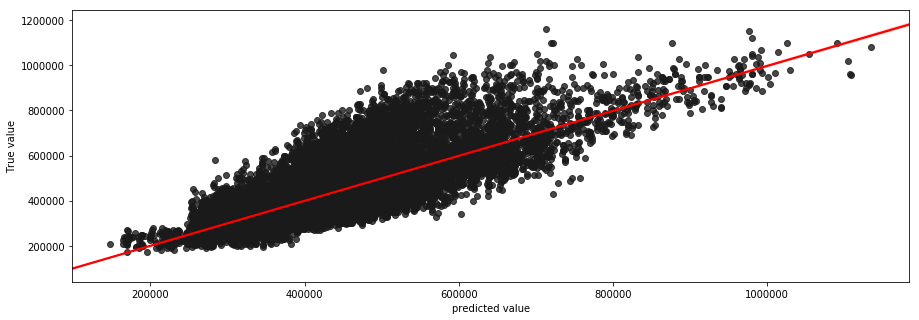

In [233]:
plot_predictions_vs_real(y_test_1, predicted, line_kws={"color":"r"}, color=".1")

#### Add town as feature

In [234]:
X_train_1 = X_train.copy()
X_test_1 = X_test.copy()
y_train_1 = y_train.copy()
y_test_1 = y_test.copy()

ohe = OneHotEncoder(handle_unknown="ignore", use_cat_names=True)
ordinal = OrdinalEncoder(handle_unknown="ignore")

ohe_cols = ["flat_model", "flat_type", "town"]
ordinal_cols = ["storey_range", "remaining_lease"]

ordinal.fit(X_train_1[ordinal_cols])
ordinal_X_train = ordinal.transform(X_train_1[ordinal_cols])
ordinal_X_test = ordinal.transform(X_test_1[ordinal_cols])
                                   
ohe.fit(X_train_1[ohe_cols])
ohe_X_train = ohe.transform(X_train_1[ohe_cols])
ohe_X_test = ohe.transform(X_test_1[ohe_cols])

X_train_1 = pd.concat([X_train_1[["floor_area_sqm"]], ohe_X_train, ordinal_X_train], axis=1)
X_train_1.fillna(0, inplace=True)
lr = LinearRegression(normalize=True)
lr.fit(X_train_1, y_train_1)

X_test_1 = pd.concat([X_test_1[["floor_area_sqm"]], ohe_X_test, ordinal_X_test], axis=1)
X_test_1.fillna(0, inplace=True)

predicted = lr.predict(X_test_1)
mse = mean_squared_error(y_test_1, predicted)
print(np.sqrt(mse))

55688.79646233255


C:\Users\Kerem\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


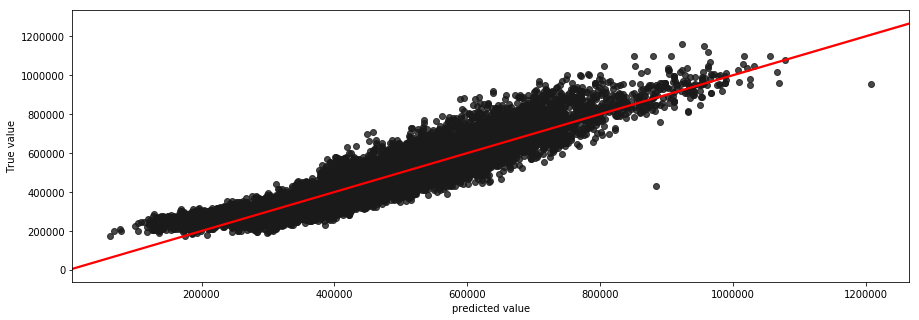

In [235]:
plot_predictions_vs_real(y_test_1, predicted, line_kws={"color":"r"}, color=".1")

#### Adding average price of last month as feature

In [240]:
def map_to_avg_price_last_month(row):
    print
    index = pd.to_datetime(row["month"])
    td = relativedelta(months=1)
    last_month_index = index-td
    try:
        avg_price_last_month = average_price_per_month.loc[last_month_index]
    except:
         avg_price_last_month = average_price_per_month.mean()
    
    return avg_price_last_month


X_train_1 = X_train.copy()
X_train_1["resale_price"] = y_train.copy()
X_test_1 = X_test.copy()
X_test_1["resale_price"] = y_test.copy()
y_train_1 = y_train.copy()
y_test_1 = y_test.copy()

average_price_per_month = X_train_1.groupby(["month"]).mean()["resale_price"]
average_price_per_month.index = pd.to_datetime(average_price_per_month.index)
del X_train_1["resale_price"]
del X_test_1["resale_price"]

X_train_1["last_month_avg"] = X_train_1.apply(lambda row: map_to_avg_price_last_month(row), axis=1 )
X_test_1["last_month_avg"] = X_test_1.apply(lambda row: map_to_avg_price_last_month(row), axis=1 )


ohe = OneHotEncoder(handle_unknown="ignore", use_cat_names=True)
ordinal = OrdinalEncoder(handle_unknown="ignore")

ohe_cols = ["flat_model", "flat_type", "town"]
ordinal_cols = ["storey_range", "remaining_lease"]


ordinal.fit(X_train_1[ordinal_cols])
ordinal_X_train = ordinal.transform(X_train_1[ordinal_cols])
ordinal_X_test = ordinal.transform(X_test_1[ordinal_cols])
                                   
ohe.fit(X_train_1[ohe_cols])
ohe_X_train = ohe.transform(X_train_1[ohe_cols])
ohe_X_test = ohe.transform(X_test_1[ohe_cols])

X_train_1 = pd.concat([X_train_1[["floor_area_sqm", "last_month_avg"]], ohe_X_train, ordinal_X_train], axis=1)
X_train_1.fillna(0, inplace=True)
lr = LinearRegression(normalize=True)
lr.fit(X_train_1, y_train_1)

X_test_1 = pd.concat([X_test_1[["floor_area_sqm", "last_month_avg"]], ohe_X_test, ordinal_X_test], axis=1)
X_test_1.fillna(0, inplace=True)

predicted = lr.predict(X_test_1)
mse = mean_squared_error(y_test_1, predicted)
print(np.sqrt(mse))

55677.259470588884


C:\Users\Kerem\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


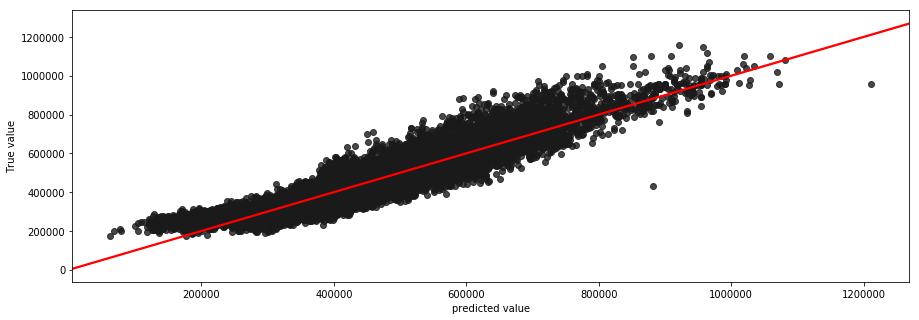

In [241]:
plot_predictions_vs_real(y_test_1, predicted, line_kws={"color":"r"}, color=".1")

In [115]:
lr.coef_

array([ 3.16674768e+03,  1.02223251e-02, -4.92484869e+16, -4.92484869e+16,
       -4.92484869e+16, -4.92484869e+16, -4.92484869e+16, -4.92484869e+16,
       -4.92484869e+16, -4.92484869e+16, -4.92484869e+16, -4.92484869e+16,
       -4.92484869e+16, -4.92484869e+16, -4.92484869e+16, -4.92484869e+16,
        5.20751462e+18, -4.92484869e+16, -4.92484869e+16, -4.92484869e+16,
       -4.92484869e+16, -4.92484869e+16, -4.92484869e+16,  5.93815174e+16,
        5.93815174e+16,  5.93815174e+16,  5.93815174e+16,  5.93815174e+16,
       -5.19738159e+18,  5.93815174e+16,  8.46852339e+16,  8.46852339e+16,
        8.46852339e+16,  8.46852339e+16,  8.46852339e+16,  8.46852339e+16,
        8.46852339e+16,  8.46852339e+16,  8.46852339e+16,  8.46852339e+16,
        8.46852339e+16,  8.46852339e+16,  8.46852339e+16,  8.46852339e+16,
        8.46852339e+16,  8.46852339e+16,  8.46852339e+16,  8.46852339e+16,
        8.46852339e+16,  8.46852339e+16,  8.46852339e+16,  8.46852339e+16,
        8.46852339e+16,  

### Other models

37511.43847142641


C:\Users\Kerem\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


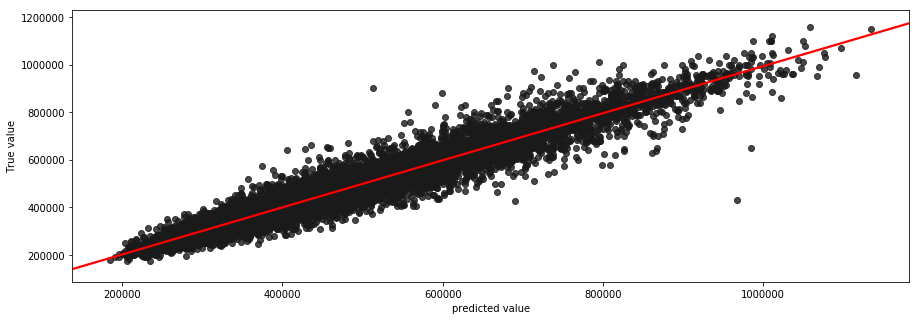

In [242]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

rf.fit(X_train_1, y_train_1)
pred = rf.predict(X_test_1)
mse = mean_squared_error(y_test_1, pred)
print(np.sqrt(mse))

plot_predictions_vs_real(y_test_1, pred, line_kws={"color":"r"}, color=".1")

59072.74101991882
[  3874.75822428     -0.           -595.07277537      0.
     -0.             -0.              0.          30500.02862371
      0.             -0.              0.         201023.31958912
      0.         170840.13405447 165589.6151755  145303.89213173
  56189.16213661      0.              0.              0.
      0.              0.              0.              0.
  -1660.25937718      0.          16690.78234425     -0.
     -0.              0.         -28581.90426508  40077.61679917
 -39736.06060767 -39127.77263621 -37931.32101063 -85555.36687652
     -0.          75986.96498963   4339.836485       -0.
  44602.69639428 -75489.13031724  87905.85844759 160890.54923508
 -22206.70826211  98855.29706375  89431.64523112 202129.34857352
      0.         160407.61659756 169224.80640245 -23603.4894127
 144238.86632971 -79008.88234524  53115.29942243 173904.14635039
   9640.5254343    3083.31738765]


C:\Users\Kerem\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


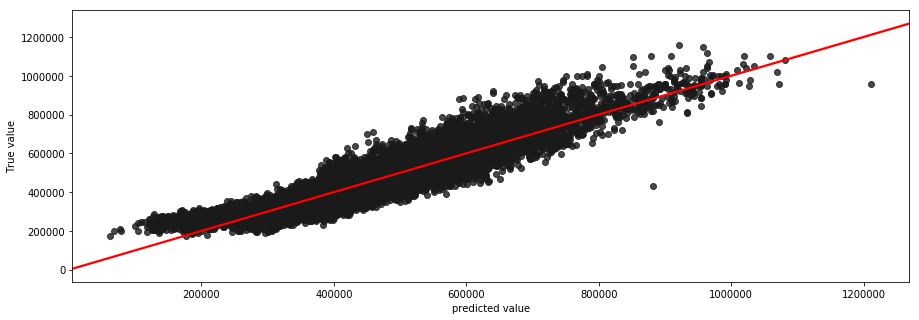

In [243]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=11, normalize=True)

lasso.fit(X_train_1, y_train_1)
pred = lasso.predict(X_test_1)
mse = mean_squared_error(y_test_1, pred)
print(np.sqrt(mse))
print(lasso.coef_)

plot_predictions_vs_real(y_test_1, predicted, line_kws={"color":"r"}, color=".1")

In [85]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1, normalize=True)

ridge.fit(X_train_1, y_train_1)
pred = ridge.predict(X_test_1)
mse = mean_squared_error(y_test_1, pred)
print(np.sqrt(mse))
print(lasso.coef_)

60046.39873468307
[ 3.16930820e+03  4.34203730e-02 -0.00000000e+00 -9.47722999e+03
 -2.92574336e+03  5.48396058e+03 -2.14893099e+03  5.80691947e+04
 -4.90665169e+03  1.52204734e+05  1.63652292e+04  2.85554662e+04
  1.71918955e+05  3.22219229e+05  1.63199378e+05  1.74565388e+05
  9.73258137e+03  1.28513537e+05  2.32092643e+05  7.27044186e+04
  1.71277365e+05  4.70125593e+04  1.63874841e+05 -0.00000000e+00
 -2.80936187e+04  3.64099484e+04  2.11535747e+04 -6.39793832e+04
 -1.09657835e+05  5.23674438e+03 -1.32165902e+05 -7.49716395e+04
  1.10248445e+05  6.45737560e+04 -4.85991125e+04  4.58378045e+04
  1.11082873e+05 -1.09089889e+05 -2.61190059e+04  4.41039857e+04
 -7.73308537e+04 -8.54847988e+04  1.02371681e+05 -2.22748069e+04
  1.02824486e+02  4.95597709e+03 -1.18089405e+05 -6.95762308e+04
  1.84361969e+05  1.69018315e+05  1.51623820e+05  8.60411110e+04
 -6.48831446e+04  1.78718683e+05  2.27767023e+05  2.47167204e+05
  2.35139253e+03  4.72111513e+03]
